In [1]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import decorator

In [2]:
with open('CPUdata_v2.csv') as csv_file:
    cpunumber = []
    cpuname = []
    singlescore = []
    multiscore = []
    clkspd = []
    numcores = []
    numthreads = []
    codename = []
    year = []
    
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        #skip the first line which is the colunn names
        if line_count == 0:
            #print(row)
            line_count += 1
        else:
            checkyear = float(row[8])
            if checkyear != 0:
                if row[0] and row[1] and row[2] and row[3] and row[4] and row[5] and row[6] and row[7] and row[8]:
                    cpunumber.append(row[0])
                    cpuname.append(row[1])
                    singlescore.append(float(row[2]))
                    multiscore.append(float(row[3]))
                    clkspd.append(float(row[4]))
                    numcores.append(float(row[5]))
                    numthreads.append(float(row[6]))
                    codename.append(row[7])
                    year.append(float(row[8]))
            
            
            line_count += 1

In [3]:
nnn = 0
cpunamebuffer = cpuname
singlescorebuffer = singlescore
multiscorebuffer = multiscore
clkspdbuffer = clkspd
numcoresbuffer = numcores
numthreadsbuffer = numthreads

sortedyear = sorted(enumerate(year), key=lambda i: i[1])
for tup in sorted(enumerate(year), key=lambda i: i[1]):
    cpuname[nnn] = cpunamebuffer[tup[nnn]]
    singlescore[nnn] = singlescorebuffer[tup[nnn]]
    multiscore[nnn] = multiscorebuffer[tup[nnn]]
    clkspd[nnn] = clkspdbuffer[tup[nnn]]
    numcores[nnn] = numcoresbuffer[tup[nnn]]
    numthreads[nnn] = numthreadsbuffer[tup[nnn]]

In [4]:
print(cpuname[0], singlescore[0], clkspd[0])

AMD-Ryzen-Threadripper-2970WX 992.0 3000.0


In [5]:
print(len(sortedyear))
print(sortedyear[0])

1531
(992, 2003.0)


In [6]:
realsortedyear = []
for i in range(len(sortedyear)):
    realsortedyear.append(sortedyear[i][1])

In [7]:
#dont need to run this, just if the data was read from csv as is, can run this to make it float
'''
for i in range(len(realsortedyear)):
    singlescore[i] = float(singlescore[i])
    multiscore[i] = float(multiscore[i])
    numcores[i] = float(numcores[i])
    numthreads[i] = float(numthreads[i])
    clkspd[i] = float(clkspd[i])
'''

'\nfor i in range(len(realsortedyear)):\n    singlescore[i] = float(singlescore[i])\n    multiscore[i] = float(multiscore[i])\n    numcores[i] = float(numcores[i])\n    numthreads[i] = float(numthreads[i])\n    clkspd[i] = float(clkspd[i])\n'

In [8]:
#data is sorted reversely for some reason XD 
singlescore.reverse()
multiscore.reverse()
numcores.reverse()
clkspd.reverse()
numthreads.reverse()


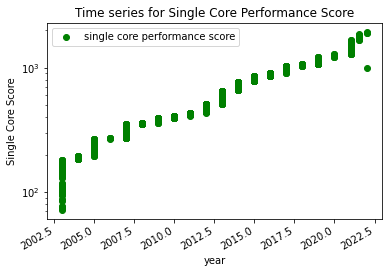

In [9]:
plt.yscale('log')
plt.rcParams["figure.figsize"] = (15,15)
plt.gcf().autofmt_xdate()
plt.scatter(realsortedyear, singlescore, label = 'single core performance score', color = 'g')
plt.xlabel('year')
plt.ylabel('Single Core Score')
plt.title("Time series for Single Core Performance Score")
plt.legend();
plt.savefig('SingleCorePerformance.png')

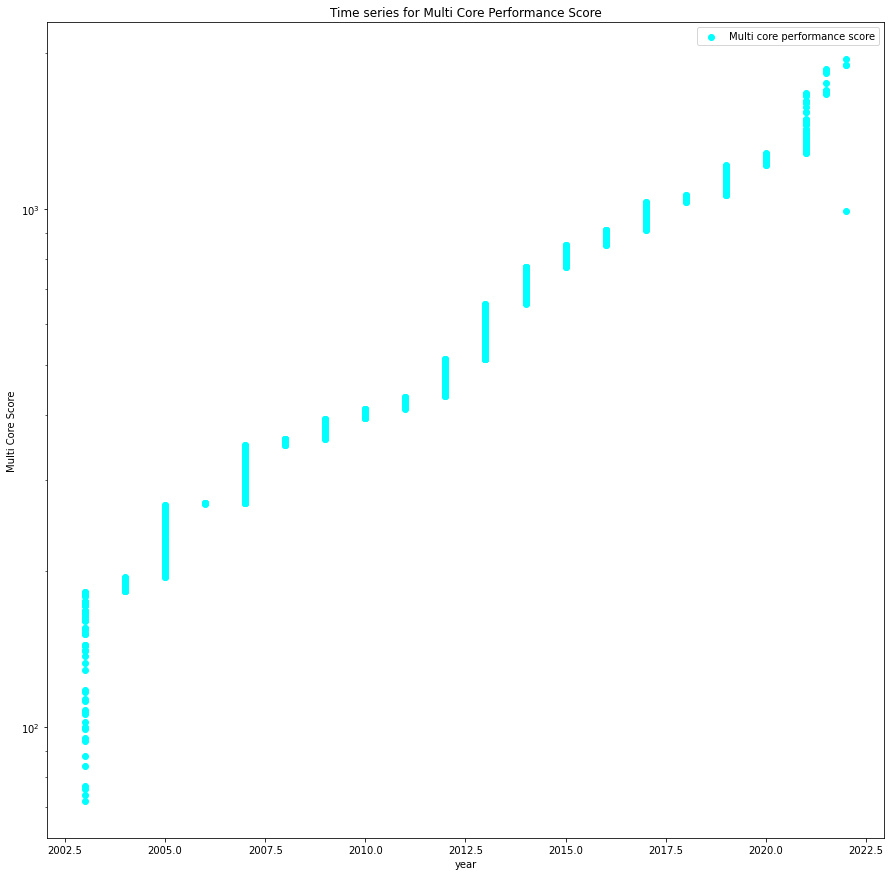

In [10]:
plt.yscale('log')
plt.scatter(realsortedyear, singlescore, label = 'Multi core performance score', color = 'cyan')
plt.xlabel('year')
plt.ylabel('Multi Core Score')
plt.title("Time series for Multi Core Performance Score")
plt.legend();
plt.savefig('MultiCorePerformance.png')

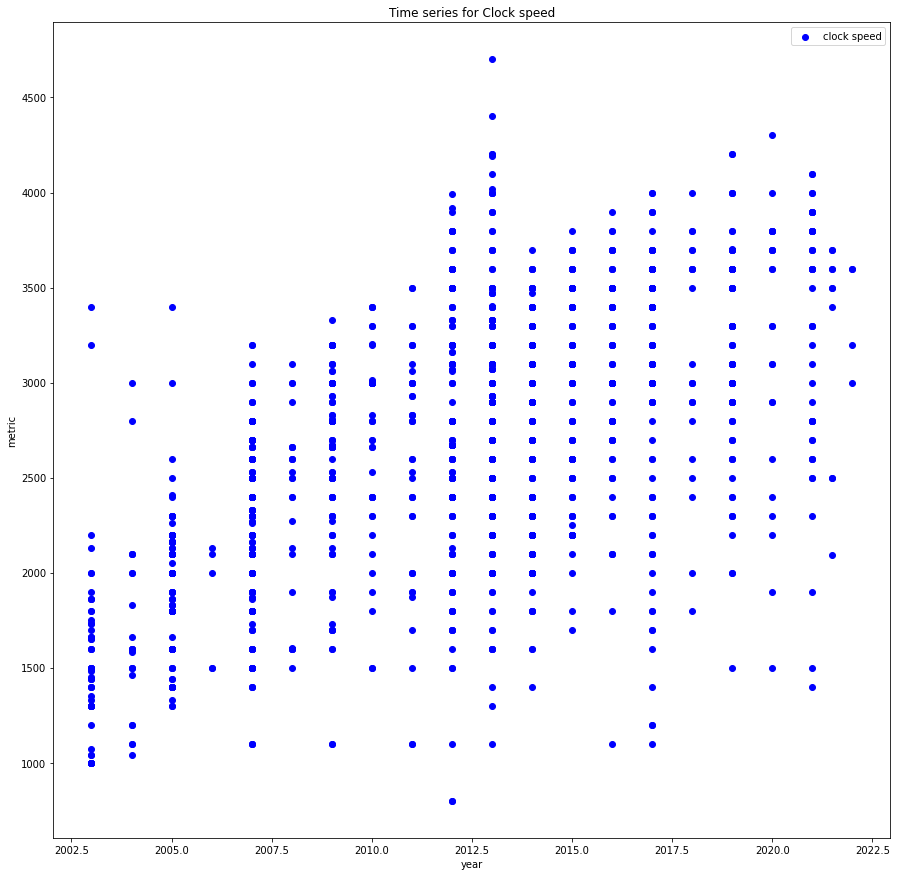

In [11]:
#plt.yscale('log')
plt.scatter(realsortedyear, clkspd, label = 'clock speed', color = 'b')
plt.xlabel('year')
plt.ylabel('metric')
plt.title("Time series for Clock speed")
plt.legend();
plt.savefig('ClockSpeed.png')

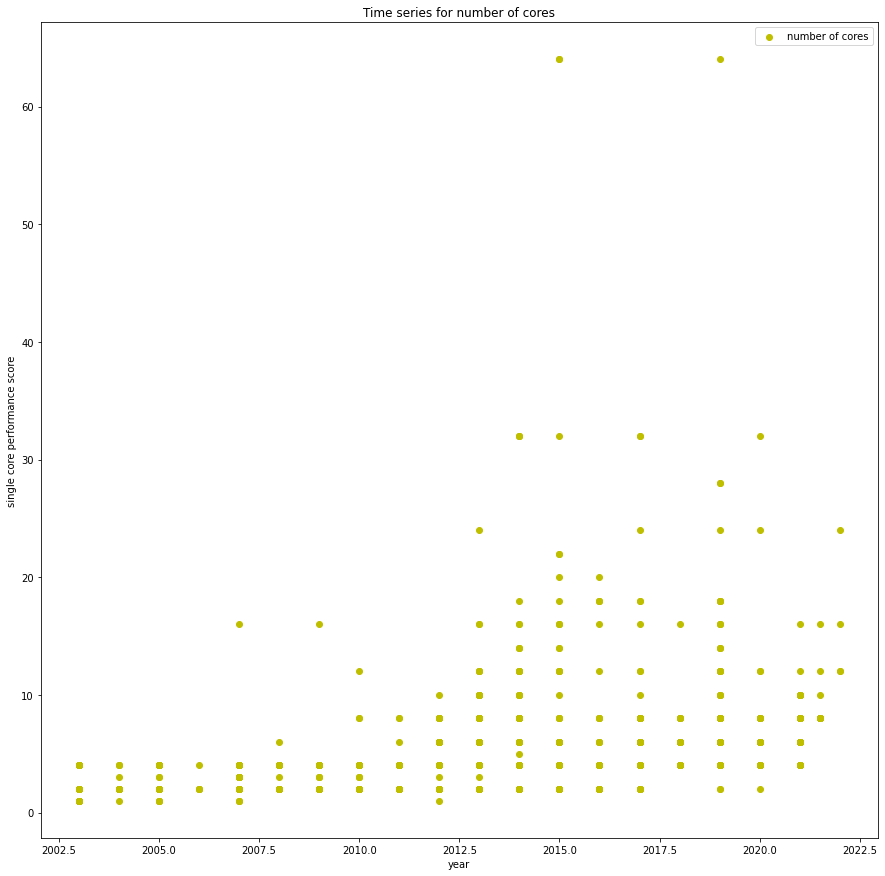

In [12]:
#plt.yscale('log')
plt.scatter(realsortedyear, numcores, label = 'number of cores', color = 'y')
plt.xlabel('year')
plt.ylabel('single core performance score')
plt.title("Time series for number of cores")
plt.legend();
plt.savefig('NumberOfCores.png')

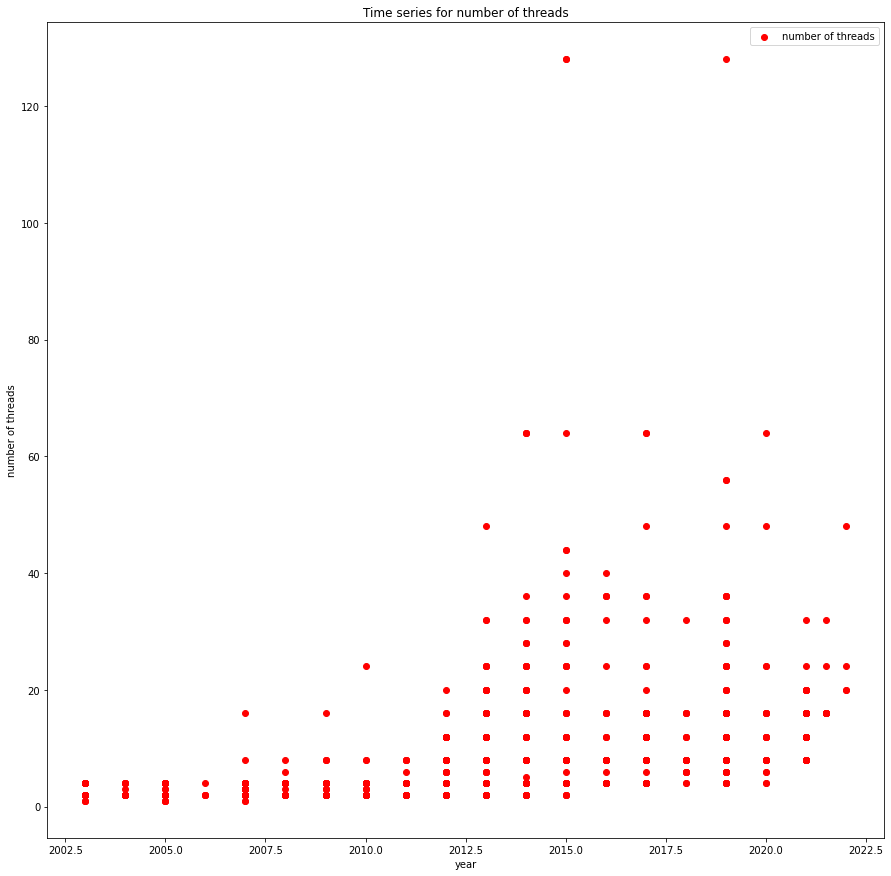

In [13]:
#plt.yscale('log')
plt.scatter(realsortedyear, numthreads, label = 'number of threads', color = 'r')
plt.xlabel('year')
plt.ylabel('number of threads')
plt.title("Time series for number of threads")
plt.legend();
plt.savefig('NumerOfThreads.png')

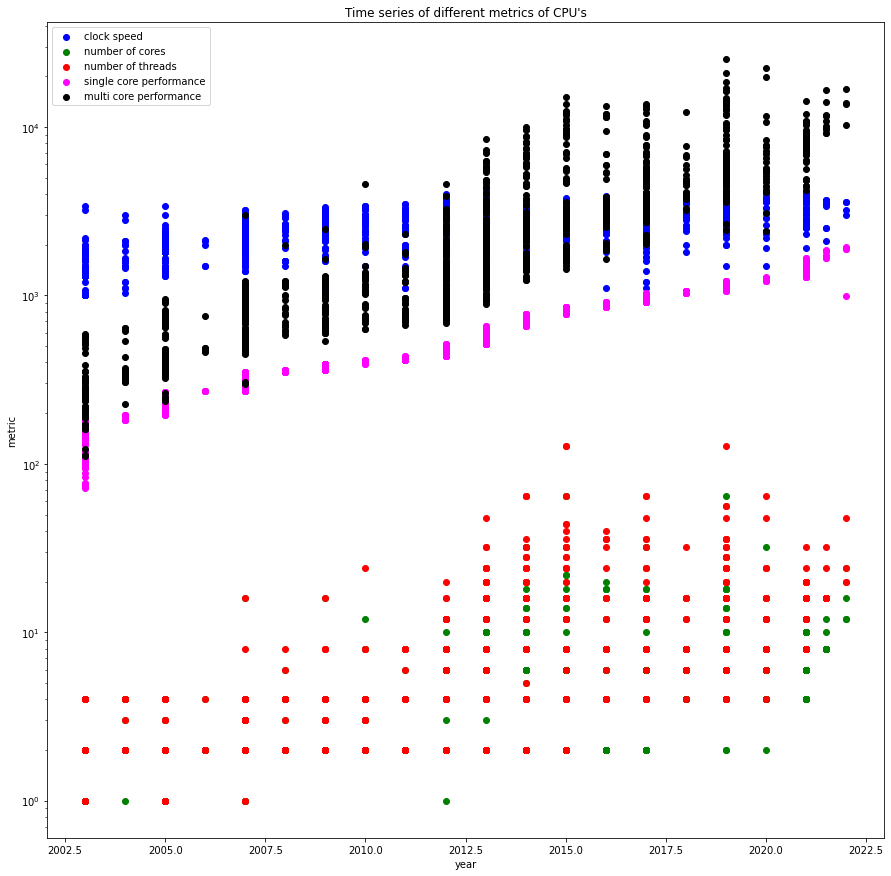

In [14]:
plt.yscale('log')
plt.scatter(realsortedyear, clkspd, label = 'clock speed', color = 'b')
plt.scatter(realsortedyear, numcores, label = 'number of cores', color = 'g')
plt.scatter(realsortedyear, numthreads, label = 'number of threads', color = 'r')
plt.scatter(realsortedyear, singlescore, label = 'single core performance', color = 'magenta')
plt.scatter(realsortedyear, multiscore, label = 'multi core performance', color = 'black')
plt.xlabel('year')
plt.ylabel('metric')
plt.title("Time series of different metrics of CPU's")
plt.legend();
plt.savefig('OverallMetrics.png')

In [15]:
#rolling mean
import pandas as pd

In [16]:
df = pd.DataFrame({'CPU Name': cpuname, 'Year Released':realsortedyear, 'Single Core Performance':singlescore, 'Multi Core Performance':multiscore, 'Clock Speed':clkspd, 'Number of Cores':numcores, 'Number of Threads':numthreads})

In [17]:
df.head(20)

,CPU Name,Year Released,Single Core Performance,Multi Core Performance,Clock Speed,Number of Cores,Number of Threads
0,AMD-Ryzen-Threadripper-2970WX,2003.0,72.0,122.0,1660.0,1.0,2.0
1,Intel-Core-i9-12900KF,2003.0,74.0,204.0,1600.0,2.0,4.0
2,Intel-Core-i7-12700K,2003.0,76.0,206.0,1500.0,2.0,4.0
3,Intel-Core-i7-12700KF,2003.0,77.0,113.0,1660.0,1.0,2.0
4,Intel-Core-i5-12600K,2003.0,84.0,219.0,1660.0,2.0,4.0
5,Intel-Core-i7-12700,2003.0,88.0,163.0,1000.0,2.0,2.0
6,Intel-Core-i9-11900K,2003.0,94.0,257.0,1800.0,2.0,4.0
7,Intel-Core-i9-11900KF,2003.0,95.0,162.0,1000.0,2.0,2.0
8,Intel-Core-i9-11900F,2003.0,99.0,173.0,1300.0,2.0,2.0
9,Intel-Core-i7-11700K,2003.0,100.0,287.0,1860.0,2.0,4.0


In [18]:
df['Rolling Single Core Score'] = df['Single Core Performance'].rolling(window=5).mean()

<AxesSubplot:xlabel='Year Released', ylabel='Rolling Single Core Score'>

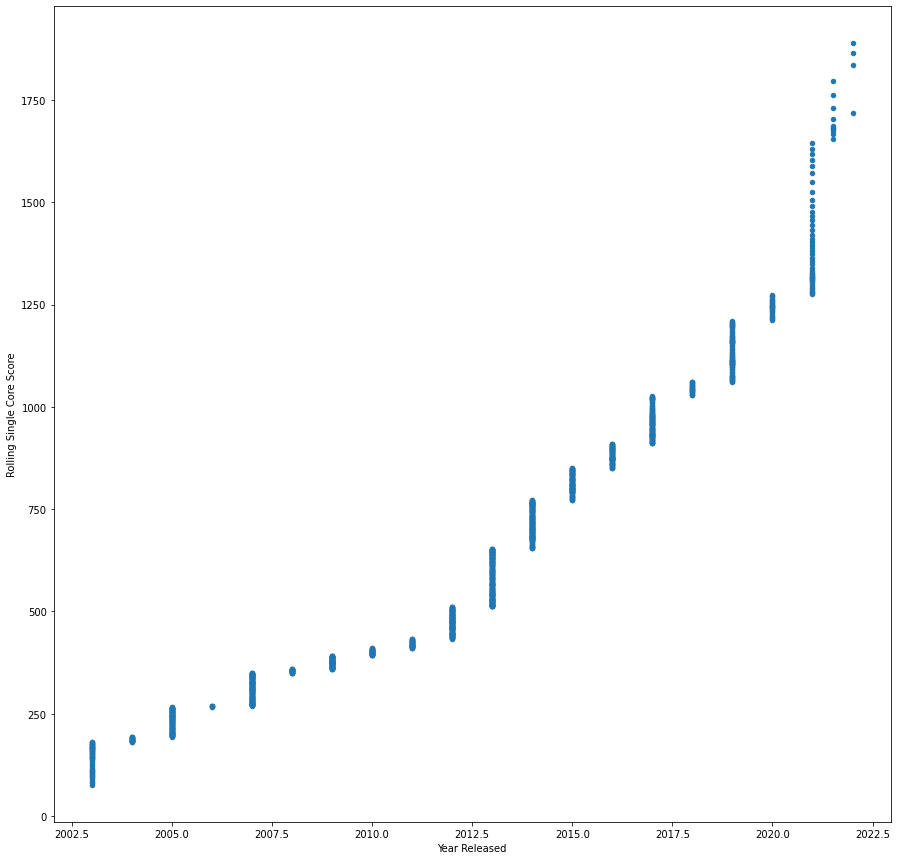

In [19]:
df.plot.scatter(x='Year Released', y='Rolling Single Core Score')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling Multi Core Score'>

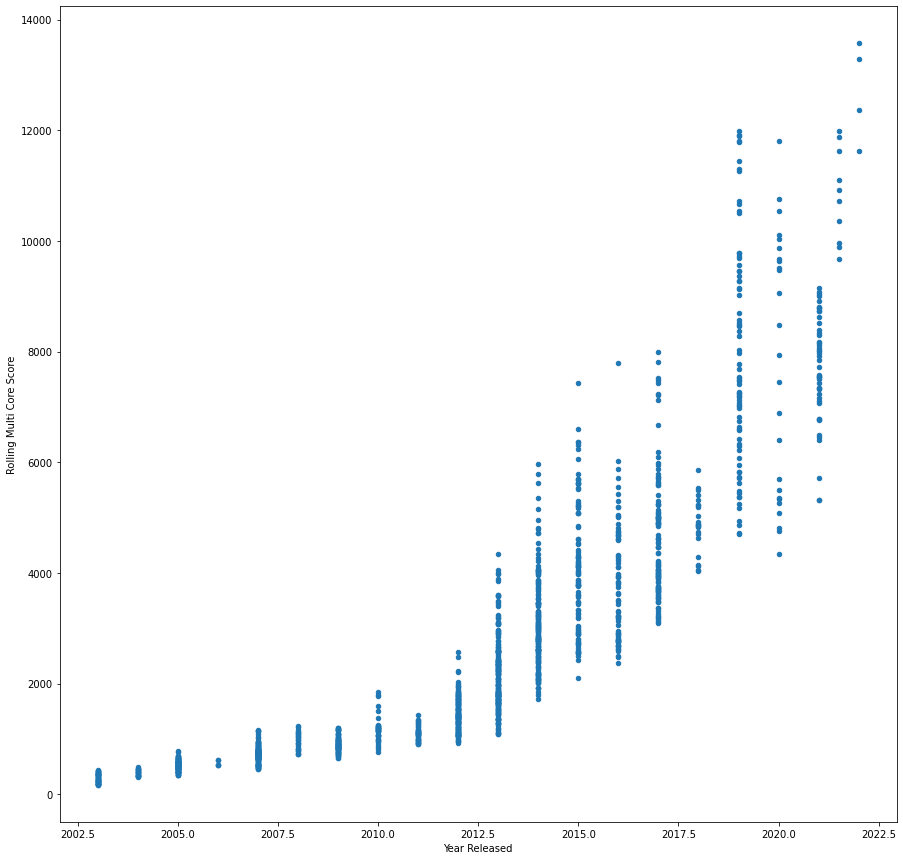

In [20]:
df['Rolling Multi Core Score'] = df['Multi Core Performance'].rolling(window=5).mean()
df.plot.scatter(x='Year Released', y='Rolling Multi Core Score')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling Average Clock Speed'>

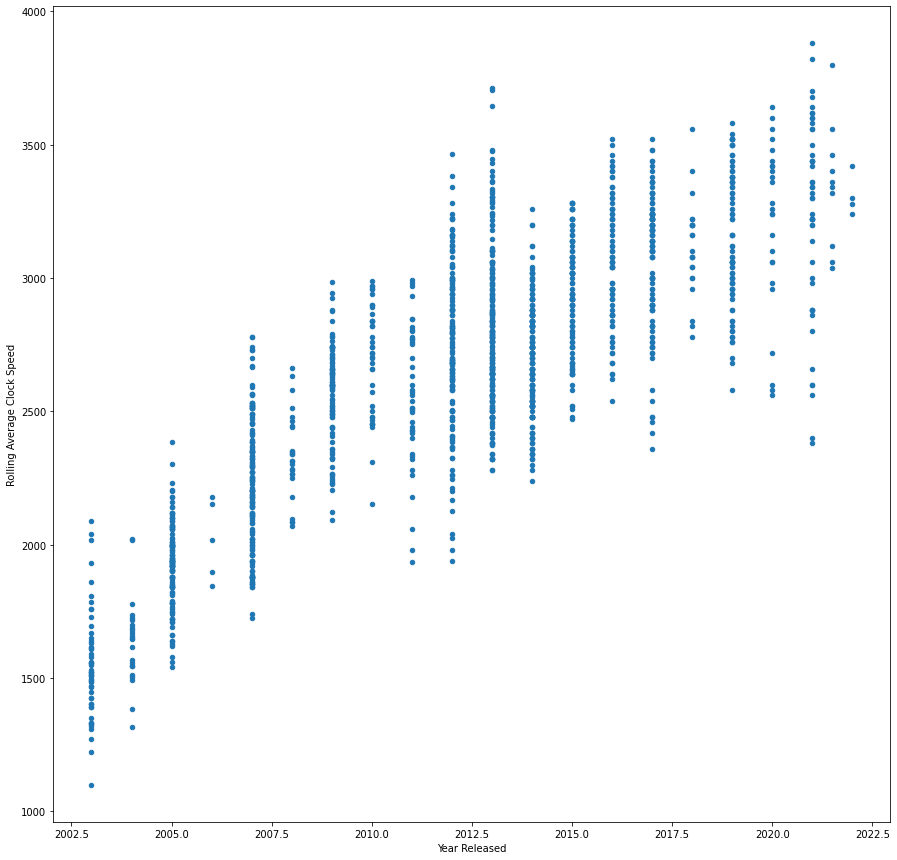

In [21]:
df['Rolling Average Clock Speed'] = df['Clock Speed'].rolling(window=5).mean()
df.plot.scatter(x='Year Released', y='Rolling Average Clock Speed')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling Average Number of Cores'>

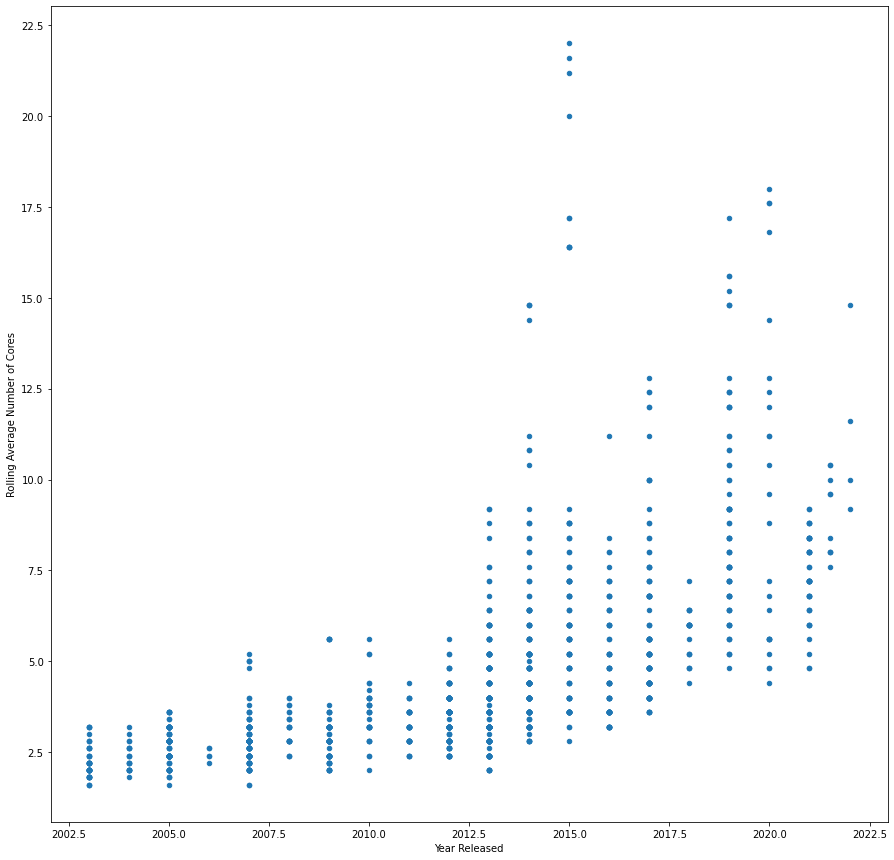

In [22]:
df['Rolling Average Number of Cores'] = df['Number of Cores'].rolling(window=5).mean()
df.plot.scatter(x='Year Released', y='Rolling Average Number of Cores')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling Average Number of Threads'>

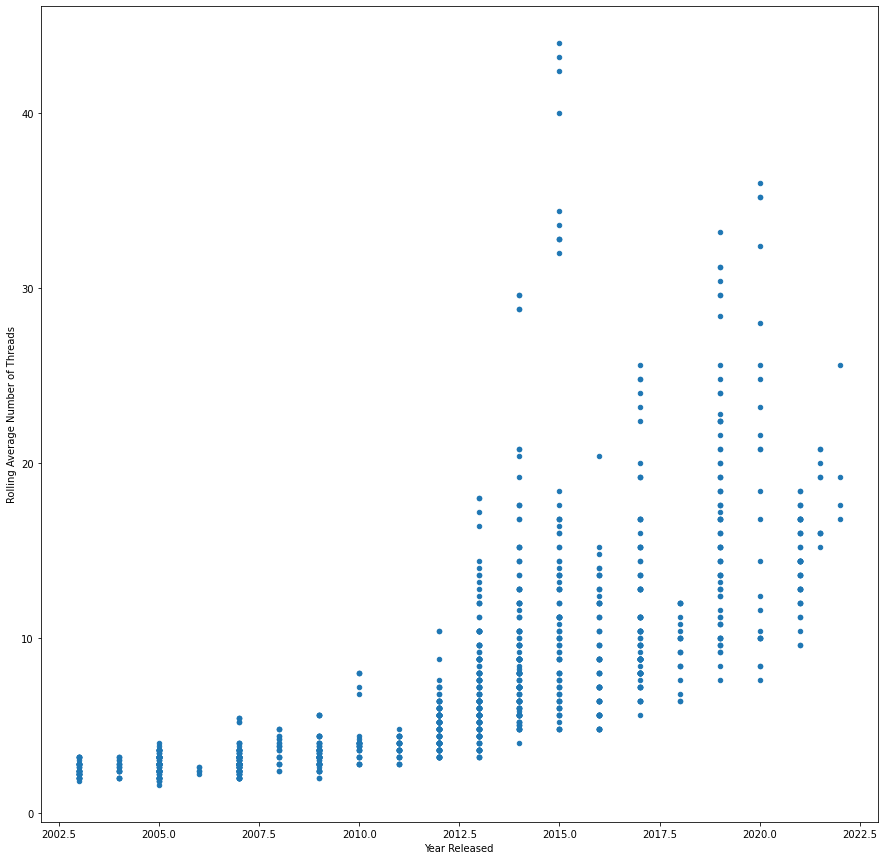

In [23]:
df['Rolling Average Number of Threads'] = df['Number of Threads'].rolling(window=5).mean()
df.plot.scatter(x='Year Released', y='Rolling Average Number of Threads')

In [24]:
df['Rolling Year'] = df['Year Released'].rolling(window=5).mean()

<AxesSubplot:xlabel='Rolling Year'>

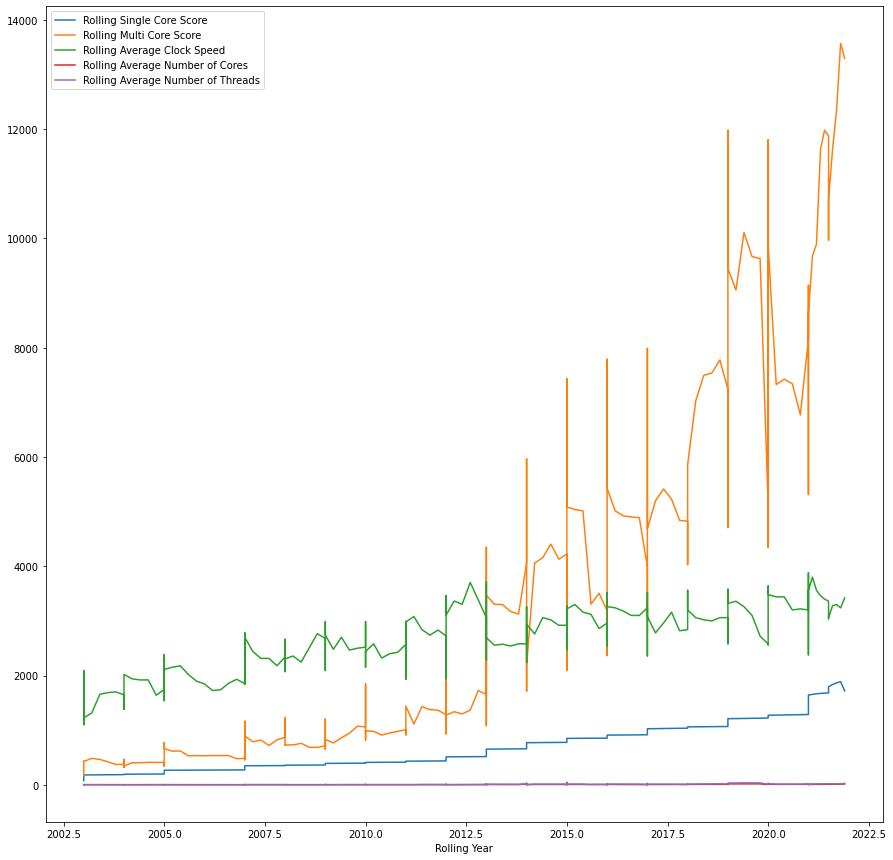

In [25]:
df.plot.line(x='Rolling Year', y=['Rolling Single Core Score','Rolling Multi Core Score','Rolling Average Clock Speed','Rolling Average Number of Cores','Rolling Average Number of Threads'])

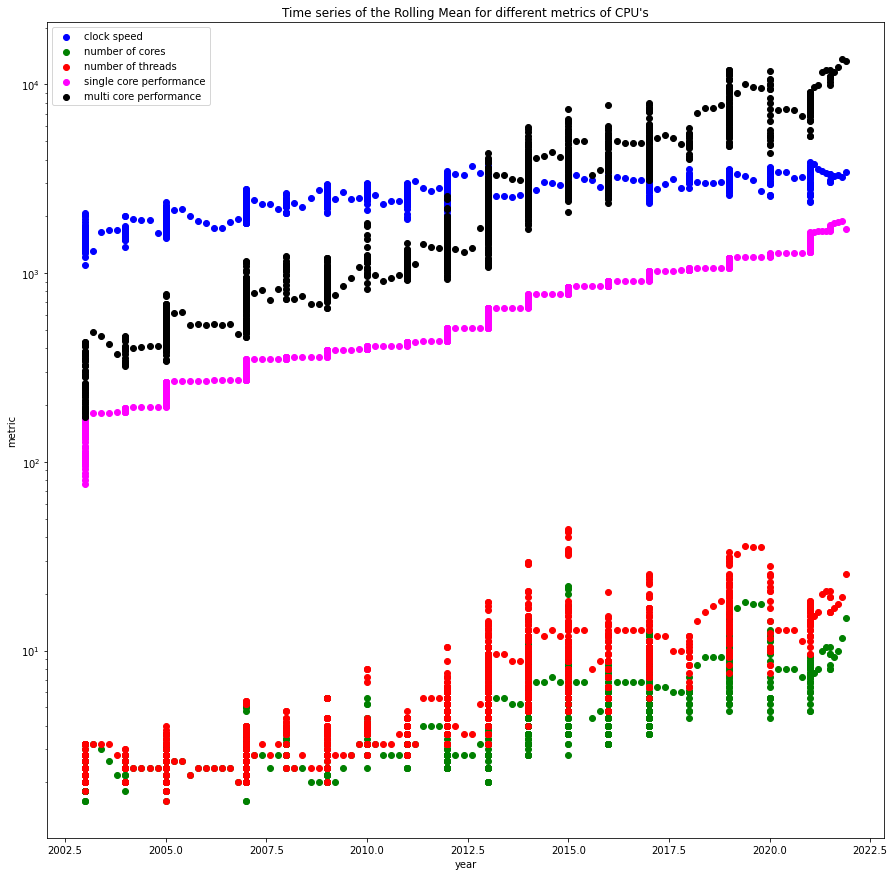

In [26]:
plt.yscale('log')
plt.scatter(df['Rolling Year'], df['Rolling Average Clock Speed'], label = 'clock speed', color = 'b')
plt.scatter(df['Rolling Year'], df['Rolling Average Number of Cores'], label = 'number of cores', color = 'g')
plt.scatter(df['Rolling Year'], df['Rolling Average Number of Threads'], label = 'number of threads', color = 'r')
plt.scatter(df['Rolling Year'], df['Rolling Single Core Score'], label = 'single core performance', color = 'magenta')
plt.scatter(df['Rolling Year'], df['Rolling Multi Core Score'], label = 'multi core performance', color = 'black')
plt.xlabel('year')
plt.ylabel('metric')
plt.title("Time series of the Rolling Mean for different metrics of CPU's")
plt.legend();
plt.savefig('OverallRollingAverageMetrics.png')

In [27]:
dfcopy = df
dfcopy['Rolling STD Single Core Score'] = df['Single Core Performance'].rolling(window=5).std()
dfcopy['Rolling STD Multi Core Score'] = df['Multi Core Performance'].rolling(window=5).std()
dfcopy['Rolling STD Clock Speed'] = df['Clock Speed'].rolling(window=5).std()
dfcopy['Rolling STD Number of Cores'] = df['Number of Cores'].rolling(window=5).std()
dfcopy['Rolling STD Number of Threads'] = df['Number of Threads'].rolling(window=5).std()
dfcopy['Rolling STD Year'] = df['Year Released'].rolling(window=5).std()

<AxesSubplot:xlabel='Year Released', ylabel='Rolling STD Single Core Score'>

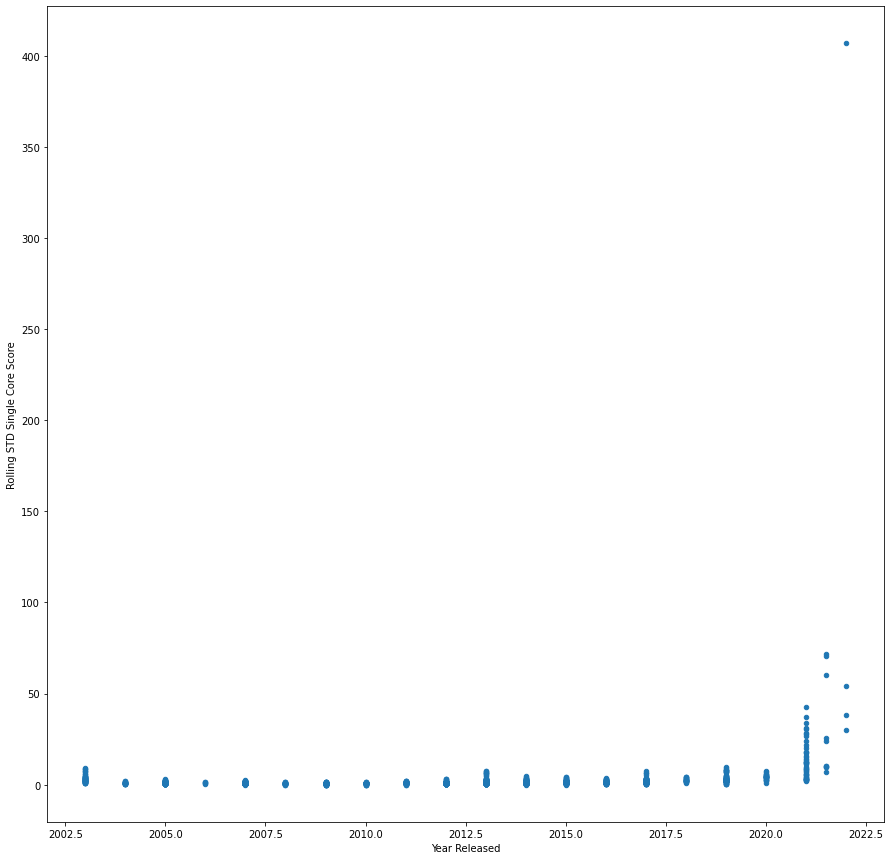

In [28]:
dfcopy.plot.scatter(x='Year Released', y='Rolling STD Single Core Score')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling STD Multi Core Score'>

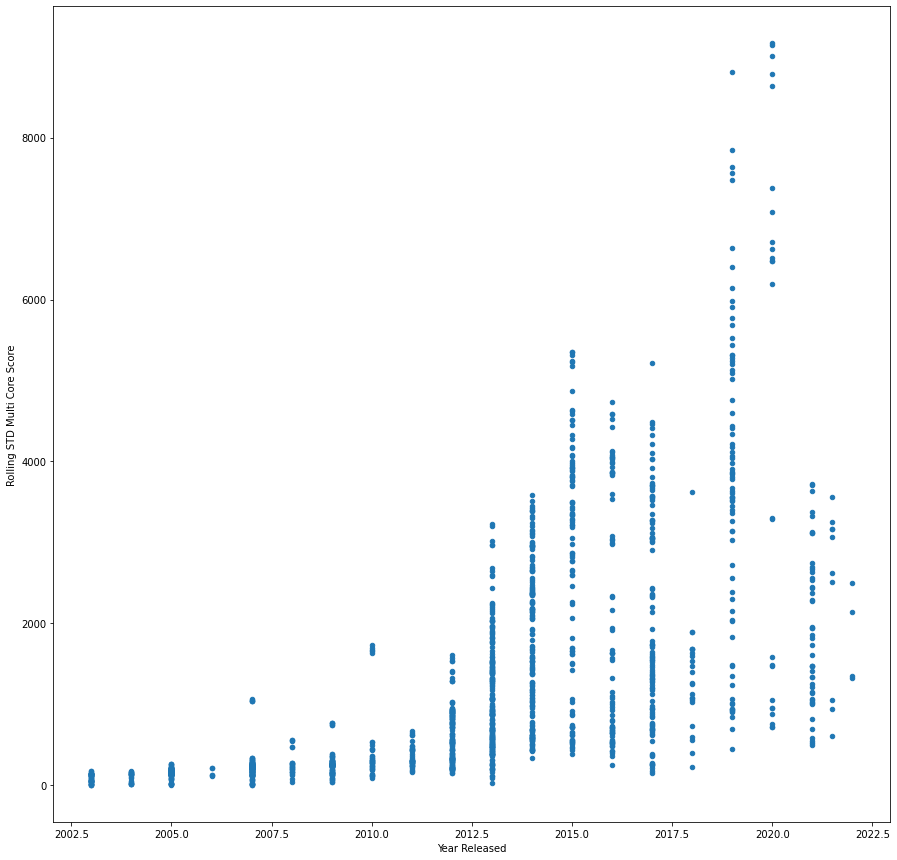

In [29]:
dfcopy.plot.scatter(x='Year Released', y='Rolling STD Multi Core Score')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling STD Clock Speed'>

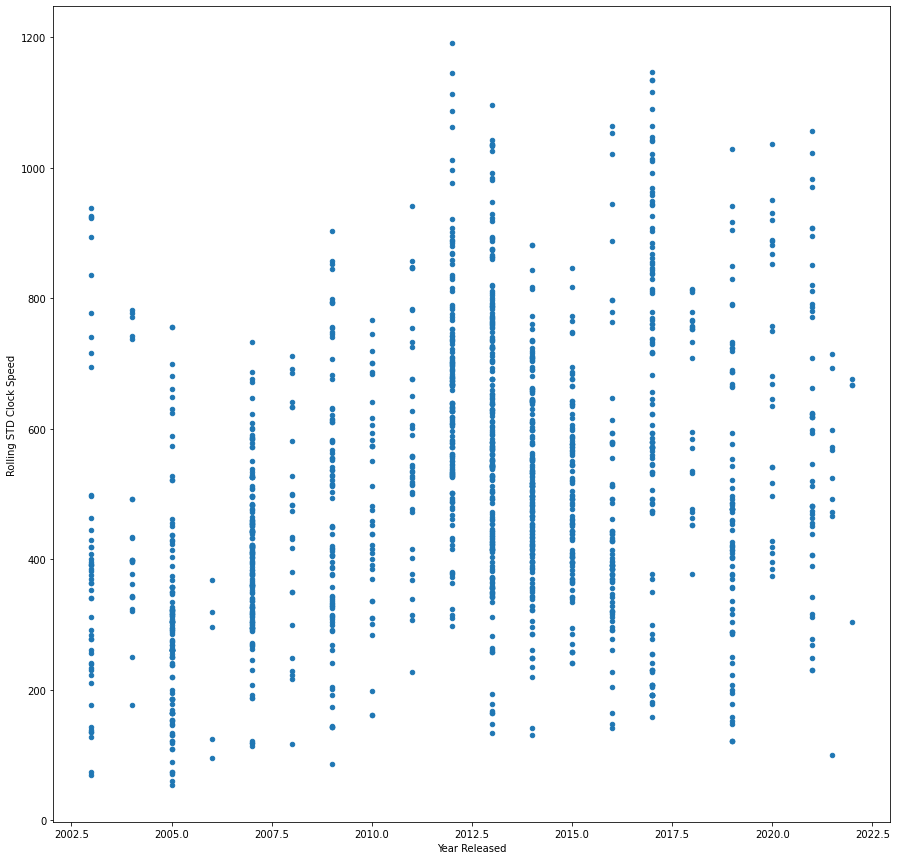

In [30]:
dfcopy.plot.scatter(x='Year Released', y='Rolling STD Clock Speed')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling STD Number of Cores'>

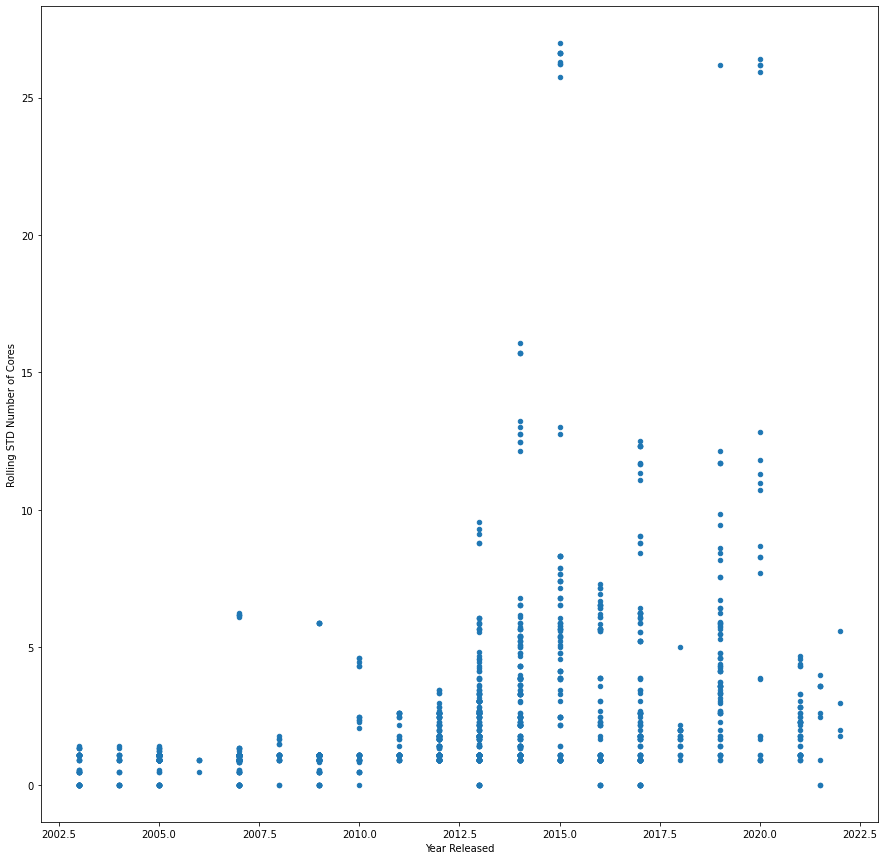

In [31]:
dfcopy.plot.scatter(x='Year Released', y='Rolling STD Number of Cores')

<AxesSubplot:xlabel='Year Released', ylabel='Rolling STD Number of Threads'>

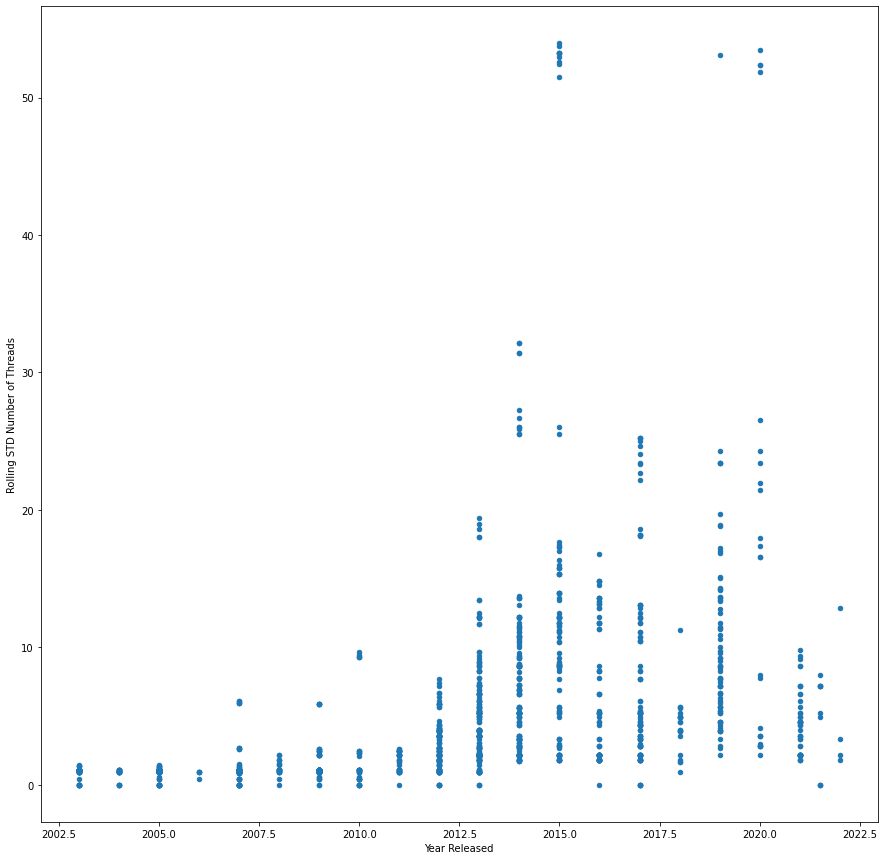

In [32]:
dfcopy.plot.scatter(x='Year Released', y='Rolling STD Number of Threads')

In [33]:
#sending dataframe to csv
dfcopy.to_csv('CPUdata_avg_std.csv')

In [34]:
#Normalized Data from csv
dfnormal = pd.read_csv('CPUdata_norm.csv', index_col=0)

In [35]:
dfnormal.head(10)

,Rolling singlescore Average,Rolling singlescore Standard Deviation,Rolling multiscore Average,Rolling multiscore Standard Deviation,Rolling clkspd Average,Rolling clkspd Standard Deviation,Rolling numcores Average,Rolling numcores Standard Deviation,Rolling numthreads Average,Rolling numthreads Standard Deviation,Rolling year Average,Rolling year Standard Deviation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.011213,0.000000,0.004944,0.185612,0.013283,0.000000,0.020311,0.037736,0.020311,0.0,0.0
5,0.001767,0.014587,0.000612,0.004128,0.138129,0.196882,0.009804,0.016584,0.037736,0.020311,0.0,0.0
6,0.003975,0.018594,0.001403,0.005423,0.152518,0.226139,0.009804,0.016584,0.037736,0.020311,0.0,0.0
7,0.006073,0.018283,0.000747,0.005492,0.116547,0.296302,0.009804,0.016584,0.028302,0.020311,0.0,0.0
8,0.008502,0.014649,0.001642,0.003958,0.090647,0.277133,0.019608,0.000000,0.028302,0.020311,0.0,0.0
9,0.010268,0.011714,0.002658,0.005846,0.105036,0.320481,0.019608,0.000000,0.028302,0.020311,0.0,0.0


In [36]:
'''dfnormal.replace([np.inf, -np.inf], np.nan, inplace=True)
'''

'dfnormal.replace([np.inf, -np.inf], np.nan, inplace=True)\n'

In [37]:
'''dfnormal['Rolling singlescore Average'] = dfnormal['Rolling singlescore Average'].dropna()
dfnormal['Rolling singlescore Standard Deviation'] = dfnormal['Rolling singlescore Standard Deviation'].dropna()
dfnormal['Rolling multiscore Average'] = dfnormal['Rolling multiscore Average'].dropna()
dfnormal['Rolling multiscore Standard Deviation'] = dfnormal['Rolling multiscore Standard Deviation'].dropna()
dfnormal['Rolling clkspd Average'] = dfnormal['Rolling clkspd Average'].dropna()
dfnormal['Rolling clkspd Standard Deviation'] = dfnormal['Rolling clkspd Standard Deviation'].dropna()
dfnormal['Rolling numcores Average'] = dfnormal['Rolling numcores Average'].dropna()
dfnormal['Rolling numcores Standard Deviation'] = dfnormal['Rolling numcores Standard Deviation'].dropna()
dfnormal['Rolling numthreads Average'] = dfnormal['Rolling numthreads Average'].dropna()
dfnormal['Rolling numthreads Standard Deviation'] = dfnormal['Rolling numthreads Standard Deviation'].dropna()
dfnormal['Rolling year Average'] = dfnormal['Rolling year Average'].dropna()
dfnormal['Rolling year Standard Deviation'] = dfnormal['Rolling year Standard Deviation'].dropna()'''

"dfnormal['Rolling singlescore Average'] = dfnormal['Rolling singlescore Average'].dropna()\ndfnormal['Rolling singlescore Standard Deviation'] = dfnormal['Rolling singlescore Standard Deviation'].dropna()\ndfnormal['Rolling multiscore Average'] = dfnormal['Rolling multiscore Average'].dropna()\ndfnormal['Rolling multiscore Standard Deviation'] = dfnormal['Rolling multiscore Standard Deviation'].dropna()\ndfnormal['Rolling clkspd Average'] = dfnormal['Rolling clkspd Average'].dropna()\ndfnormal['Rolling clkspd Standard Deviation'] = dfnormal['Rolling clkspd Standard Deviation'].dropna()\ndfnormal['Rolling numcores Average'] = dfnormal['Rolling numcores Average'].dropna()\ndfnormal['Rolling numcores Standard Deviation'] = dfnormal['Rolling numcores Standard Deviation'].dropna()\ndfnormal['Rolling numthreads Average'] = dfnormal['Rolling numthreads Average'].dropna()\ndfnormal['Rolling numthreads Standard Deviation'] = dfnormal['Rolling numthreads Standard Deviation'].dropna()\ndfnormal[

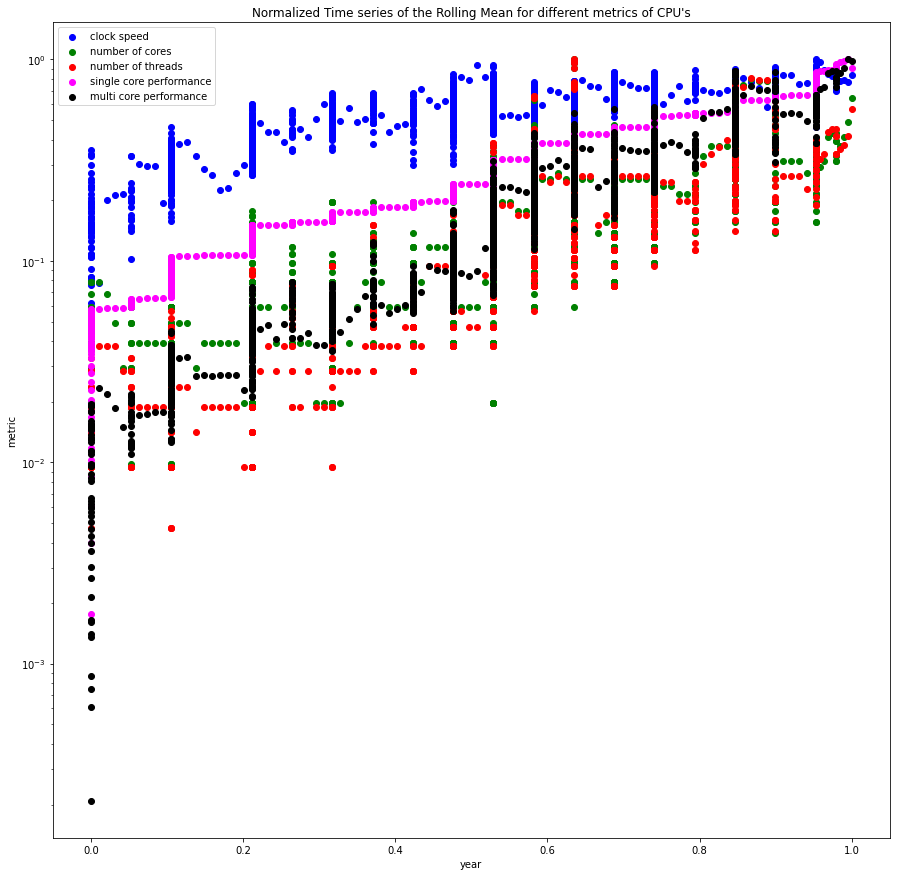

In [38]:
plt.yscale('log')
plt.scatter(dfnormal['Rolling year Average'], dfnormal['Rolling clkspd Average'], label = 'clock speed', color = 'b')
plt.scatter(dfnormal['Rolling year Average'], dfnormal['Rolling numcores Average'], label = 'number of cores', color = 'g')
plt.scatter(dfnormal['Rolling year Average'], dfnormal['Rolling numthreads Average'], label = 'number of threads', color = 'r')
plt.scatter(dfnormal['Rolling year Average'], dfnormal['Rolling singlescore Average'], label = 'single core performance', color = 'magenta')
plt.scatter(dfnormal['Rolling year Average'], dfnormal['Rolling multiscore Average'], label = 'multi core performance', color = 'black')
plt.xlabel('year')
plt.ylabel('metric')
plt.title("Normalized Time series of the Rolling Mean for different metrics of CPU's")
plt.legend();
plt.savefig('NormalizedOverallRollingAverageMetrics.png')

In [39]:
#Machine Learning Support Vector Regression implementation
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

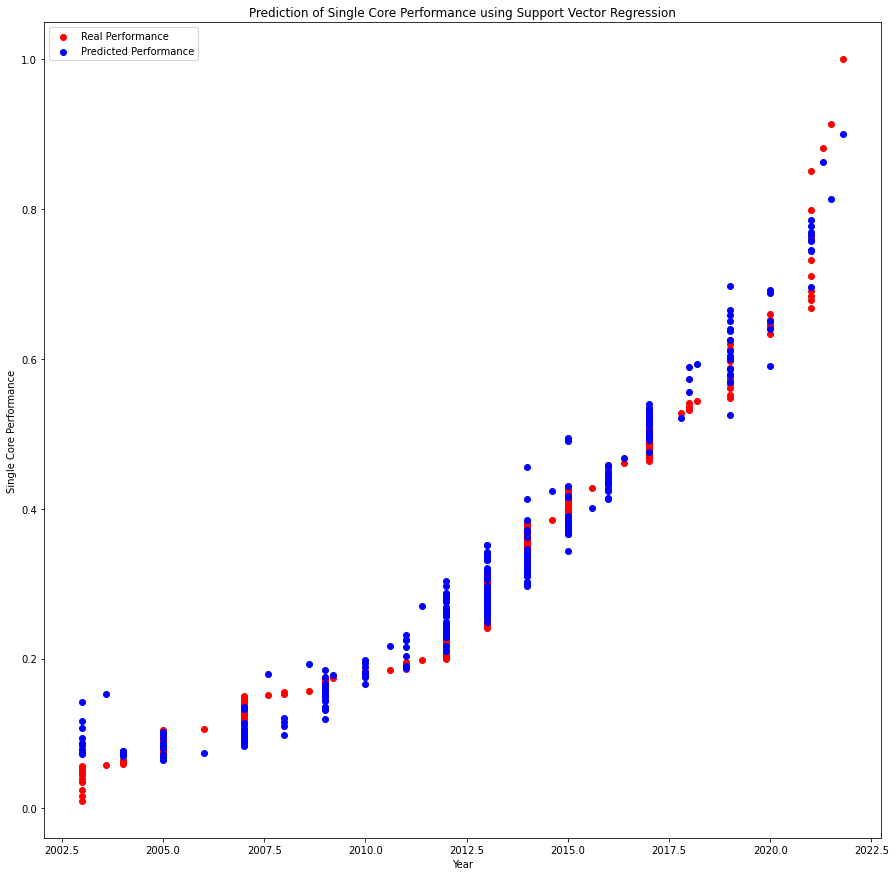

In [40]:
#SVR time series for single core
y = dfnormal['Rolling singlescore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
SVRmodel = SVR(kernel = 'rbf')
SVRmodel.fit(X,y)
x_test2 = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
testingindex = np.linspace(4, 1530, 1225).astype(int)
y.drop(testingindex,axis=0,inplace=True)
x_test2.drop(testingindex, axis=0, inplace=True)
x_test2 = x_test2.iloc[4:]
time_series_x = dfcopy.drop(['CPU Name','Year Released','Single Core Performance','Multi Core Performance','Clock Speed','Number of Cores','Number of Threads','Rolling Single Core Score','Rolling Multi Core Score','Rolling Average Clock Speed',
                             'Rolling Average Number of Cores','Rolling Average Number of Threads','Rolling STD Single Core Score','Rolling STD Multi Core Score','Rolling STD Clock Speed','Rolling STD Number of Cores',
                             'Rolling STD Number of Threads','Rolling STD Year'], axis=1)
time_series_x.drop(testingindex,axis=0,inplace=True)
time_series_x = time_series_x.iloc[4:]
ypred = SVRmodel.predict(x_test2)
dfSVRs = pd.DataFrame({'Real':y, 'Predicted':ypred})
#plt.yscale('log')
plt.scatter(time_series_x['Rolling Year'],dfSVRs.Real, label = 'Real Performance', color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfSVRs.Predicted,label = 'Predicted Performance', color = 'b')
plt.ylabel('Single Core Performance')
plt.xlabel('Year')
plt.title("Prediction of Single Core Performance using Support Vector Regression")
plt.legend();
plt.show()

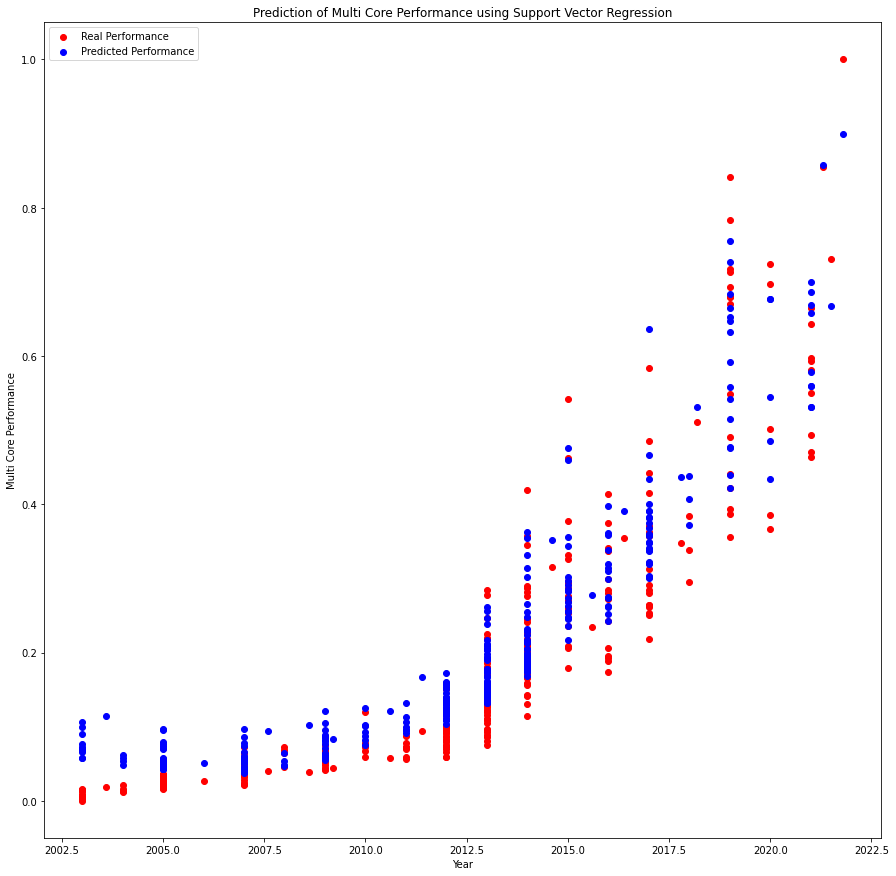

In [41]:
#SVR time series for multi core
y = dfnormal['Rolling multiscore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
SVRmodel = SVR(kernel = 'rbf')
SVRmodel.fit(X,y)
x_test2 = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
testingindex = np.linspace(4, 1530, 1225).astype(int)
y.drop(testingindex,axis=0,inplace=True)
x_test2.drop(testingindex, axis=0, inplace=True)
x_test2 = x_test2.iloc[4:]
time_series_x = dfcopy.drop(['CPU Name','Year Released','Single Core Performance','Multi Core Performance','Clock Speed','Number of Cores','Number of Threads','Rolling Single Core Score','Rolling Multi Core Score','Rolling Average Clock Speed',
                             'Rolling Average Number of Cores','Rolling Average Number of Threads','Rolling STD Single Core Score','Rolling STD Multi Core Score','Rolling STD Clock Speed','Rolling STD Number of Cores',
                             'Rolling STD Number of Threads','Rolling STD Year'], axis=1)
time_series_x.drop(testingindex,axis=0,inplace=True)
time_series_x = time_series_x.iloc[4:]
ypred = SVRmodel.predict(x_test2)
dfSVRm = pd.DataFrame({'Real':y, 'Predicted':ypred})
#plt.yscale('log')
plt.scatter(time_series_x['Rolling Year'],dfSVRm.Real, label = 'Real Performance', color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfSVRm.Predicted,label = 'Predicted Performance', color = 'b')
plt.ylabel('Multi Core Performance')
plt.xlabel('Year')
plt.title("Prediction of Multi Core Performance using Support Vector Regression")
plt.legend();
plt.show()

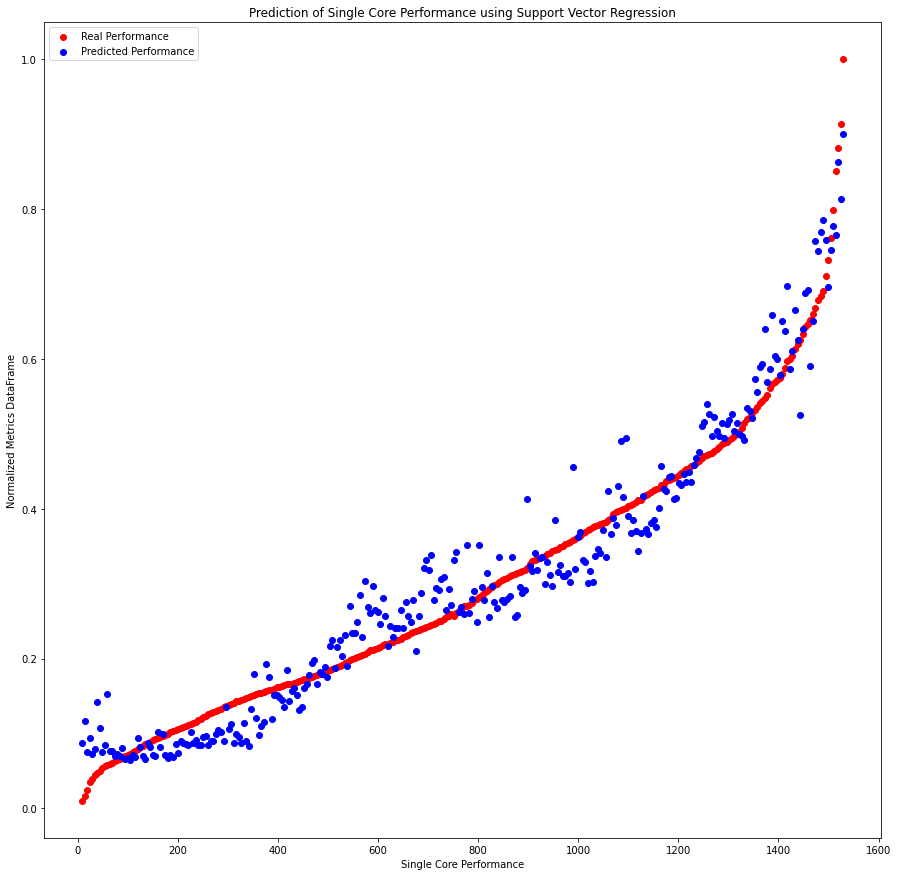

In [42]:
#metrics series SVR for single core
y = dfnormal['Rolling singlescore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
SVRmodel = SVR(kernel = 'rbf')
SVRmodel.fit(X,y)
x_test2 = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
testingindex = np.linspace(4, 1530, 1225).astype(int)
y.drop(testingindex,axis=0,inplace=True)
x_test2.drop(testingindex, axis=0, inplace=True)
x_test2 = x_test2.iloc[4:]
ypred = SVRmodel.predict(x_test2)
df4 = pd.DataFrame({'Real':y, 'Predicted':ypred})
#plt.yscale('log')
plt.scatter(df4.Real.index,df4.Real, label = 'Real Performance', color = 'r')
plt.scatter(df4.Real.index,df4.Predicted,label = 'Predicted Performance', color = 'b')
plt.ylabel('Normalized Metrics DataFrame')
plt.xlabel('Single Core Performance')
plt.title("Prediction of Single Core Performance using Support Vector Regression")
plt.legend();
plt.show()

In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,ypred)))

Mean Absolute Error: 0.03270506003223585
Mean Squared Error: 0.0016935096737850839
Root Mean Squared Error: 0.041152274223730134


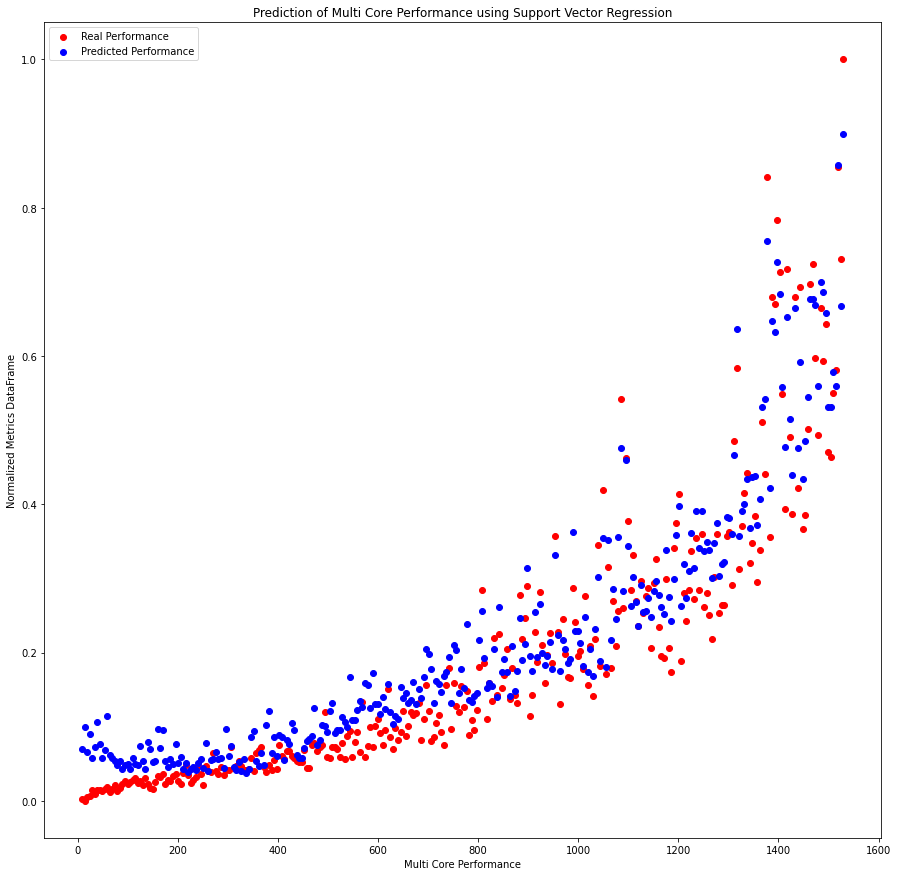

In [44]:
#metrics series SVR for multi core
y = dfnormal['Rolling multiscore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
SVRmodel = SVR(kernel = 'rbf')
SVRmodel.fit(X,y)
x_test2 = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
testingindex = np.linspace(4, 1530, 1225).astype(int)
y.drop(testingindex,axis=0,inplace=True)
x_test2.drop(testingindex, axis=0, inplace=True)
x_test2 = x_test2.iloc[4:]
ypred = SVRmodel.predict(x_test2)
df2 = pd.DataFrame({'Real':y, 'Predicted':ypred})
#plt.yscale('log')
plt.scatter(df2.Real.index,df2.Real, label = 'Real Performance', color = 'r')
plt.scatter(df2.Real.index,df2.Predicted,label = 'Predicted Performance', color = 'b')
plt.ylabel('Normalized Metrics DataFrame')
plt.xlabel('Multi Core Performance')
plt.title("Prediction of Multi Core Performance using Support Vector Regression")
plt.legend();
plt.show()

In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,ypred)))

Mean Absolute Error: 0.03552679960596961
Mean Squared Error: 0.0019023208636404494
Root Mean Squared Error: 0.04361560344235133


In [46]:
from sklearn.linear_model import LinearRegression

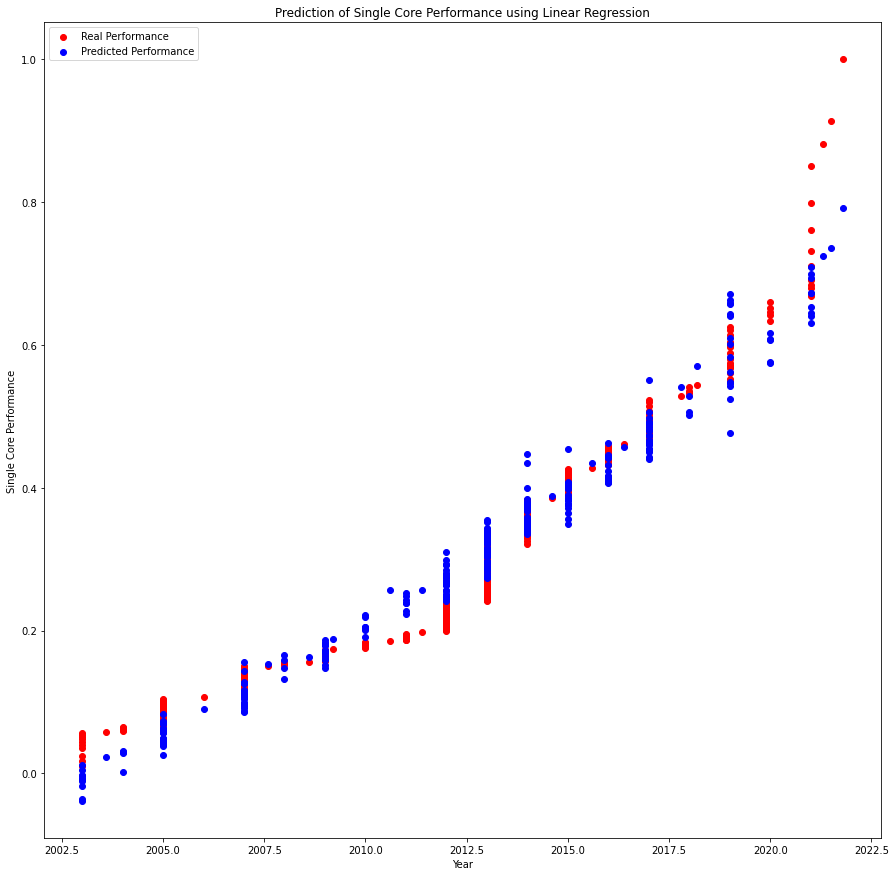

In [47]:
#time series Linear Regression for single core
y = dfnormal['Rolling singlescore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
reg = LinearRegression().fit(X,y)
reg.score(X,y)
y.drop(testingindex,axis=0,inplace=True)
predicty = reg.predict(x_test2)
dfLRs = pd.DataFrame({'Real':y, 'Predicted':predicty})
plt.scatter(time_series_x['Rolling Year'],dfLRs.Real, label = 'Real Performance', color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfLRs.Predicted,label = 'Predicted Performance', color = 'b')
plt.xlabel('Year')
plt.ylabel('Single Core Performance')
plt.title("Prediction of Single Core Performance using Linear Regression")
plt.legend();
plt.show()

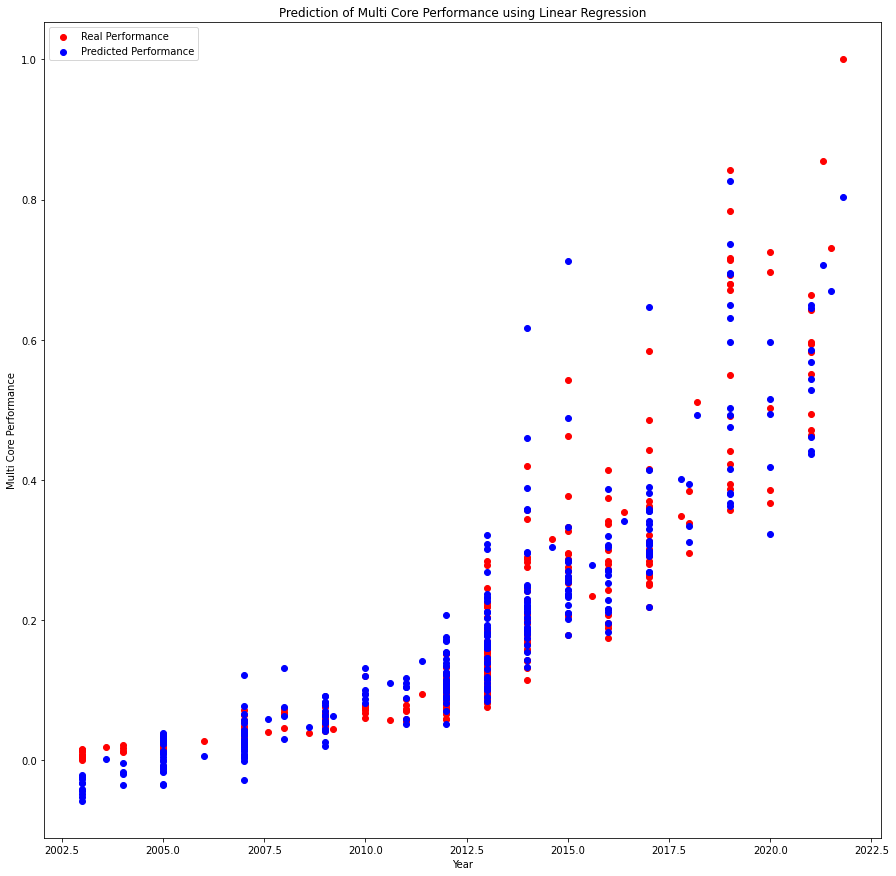

In [48]:
#time series Linear Regression for multi core
y = dfnormal['Rolling multiscore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
reg = LinearRegression().fit(X,y)
reg.score(X,y)
y.drop(testingindex,axis=0,inplace=True)
predicty = reg.predict(x_test2)
dfLRm = pd.DataFrame({'Real':y, 'Predicted':predicty})
plt.scatter(time_series_x['Rolling Year'],dfLRm.Real, label = 'Real Performance', color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfLRm.Predicted,label = 'Predicted Performance', color = 'b')
plt.xlabel('Year')
plt.ylabel('Multi Core Performance')
plt.title("Prediction of Multi Core Performance using Linear Regression")
plt.legend();
plt.show()

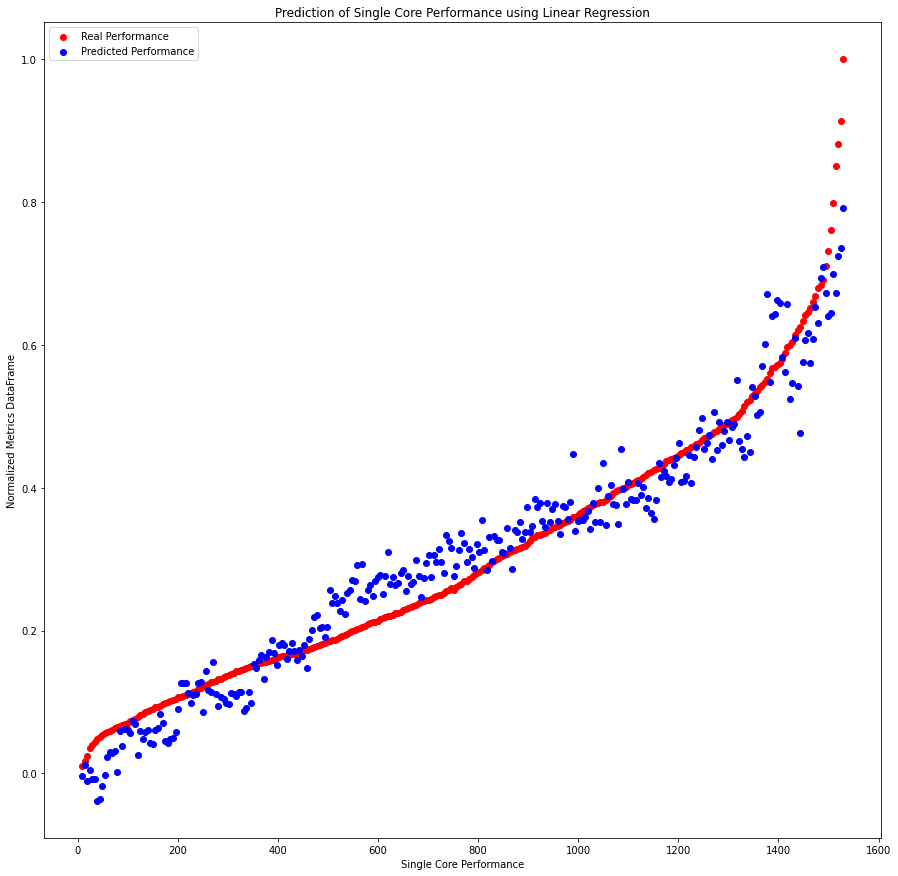

In [49]:
#metric of linear single core
y = dfnormal['Rolling singlescore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
reg = LinearRegression().fit(X,y)
reg.score(X,y)
y.drop(testingindex,axis=0,inplace=True)
predicty = reg.predict(x_test2)
df2 = pd.DataFrame({'Real':y, 'Predicted':predicty})
plt.scatter(df2.Real.index,df2.Real, label = 'Real Performance', color = 'r')
plt.scatter(df2.Real.index,df2.Predicted,label = 'Predicted Performance', color = 'b')
plt.ylabel('Normalized Metrics DataFrame')
plt.xlabel('Single Core Performance')
plt.title("Prediction of Single Core Performance using Linear Regression")
plt.legend();
plt.show()

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,ypred)))

Mean Absolute Error: 0.0943253214074104
Mean Squared Error: 0.011583504364817795
Root Mean Squared Error: 0.10762668983490013


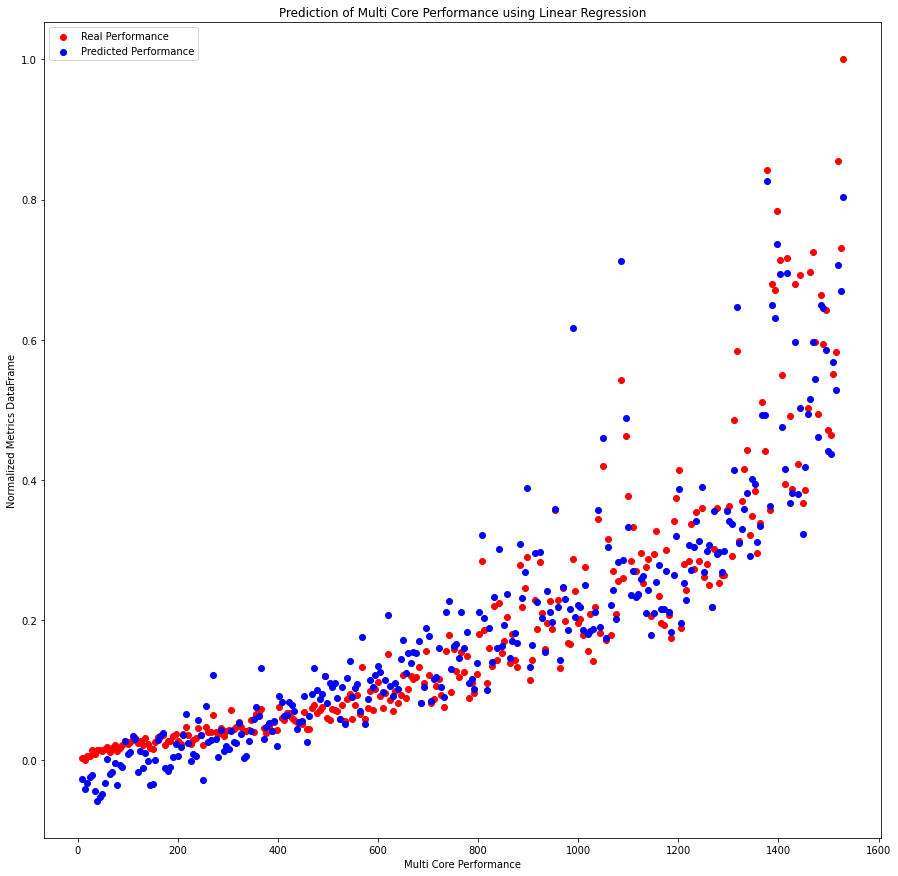

In [51]:
#metric analysis of linear regression multi core
y = dfnormal['Rolling multiscore Average']
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)
y = y.iloc[4:]
X = X.iloc[4:]
reg = LinearRegression().fit(X,y)
reg.score(X,y)
y.drop(testingindex,axis=0,inplace=True)
predicty = reg.predict(x_test2)
df2 = pd.DataFrame({'Real':y, 'Predicted':predicty})
plt.scatter(df2.Real.index,df2.Real, label = 'Real Performance', color = 'r')
plt.scatter(df2.Real.index,df2.Predicted,label = 'Predicted Performance', color = 'b')
plt.ylabel('Normalized Metrics DataFrame')
plt.xlabel('Multi Core Performance')
plt.title("Prediction of Multi Core Performance using Linear Regression")
plt.legend();
plt.show()

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,ypred)))

Mean Absolute Error: 0.03552679960596961
Mean Squared Error: 0.0019023208636404494
Root Mean Squared Error: 0.04361560344235133


In [53]:
# x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, shuffle = False)

In [54]:
#implementing RNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [56]:
#for single core performance prediction
y = dfnormal.drop(['Rolling multiscore Average','Rolling multiscore Standard Deviation','Rolling singlescore Standard Deviation', 'Rolling clkspd Average', 'Rolling clkspd Standard Deviation','Rolling numcores Average', 'Rolling numcores Standard Deviation', 'Rolling numthreads Average', 'Rolling numthreads Standard Deviation','Rolling year Average', 'Rolling year Standard Deviation'], axis = 1)
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)

In [57]:
#for multi core performance prediction
y = dfnormal.drop(['Rolling singlescore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation', 'Rolling clkspd Average', 'Rolling clkspd Standard Deviation','Rolling numcores Average', 'Rolling numcores Standard Deviation', 'Rolling numthreads Average', 'Rolling numthreads Standard Deviation','Rolling year Average', 'Rolling year Standard Deviation'], axis = 1)
X = dfnormal.drop(['Rolling singlescore Average','Rolling multiscore Average','Rolling singlescore Standard Deviation','Rolling multiscore Standard Deviation'], axis = 1)

In [58]:
y = y.iloc[4:]
X = X.iloc[4:]

In [59]:
print(y.shape)

(1527, 1)


In [60]:
print(X.shape)

(1527, 8)


In [61]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X)
scaled_X_train = Xscaler.transform(X)
print(X.shape)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y)
scaled_y_train = Yscaler.transform(y)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(1527, 8)
(1527, 1)
(1527,)


In [62]:
n_input = 25 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

print(generator[0][0].shape)

(32, 25, 8)


In [63]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               95400     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 95,551
Trainable params: 95,551
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit_generator(generator,epochs=5)
#model.fit(generator,epochs=5)

C:\Users\Sam's Laptop\AppData\Local\Temp\ipykernel_7872\3062551049.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


Epoch 1/5
47/47 [==============================] - 5s 37ms/step - loss: 0.0166
Epoch 2/5
47/47 [==============================] - 2s 37ms/step - loss: 0.0086
Epoch 3/5
47/47 [==============================] - 2s 37ms/step - loss: 0.0049
Epoch 4/5
47/47 [==============================] - 2s 36ms/step - loss: 0.0052
Epoch 5/5
47/47 [==============================] - 2s 37ms/step - loss: 0.0044


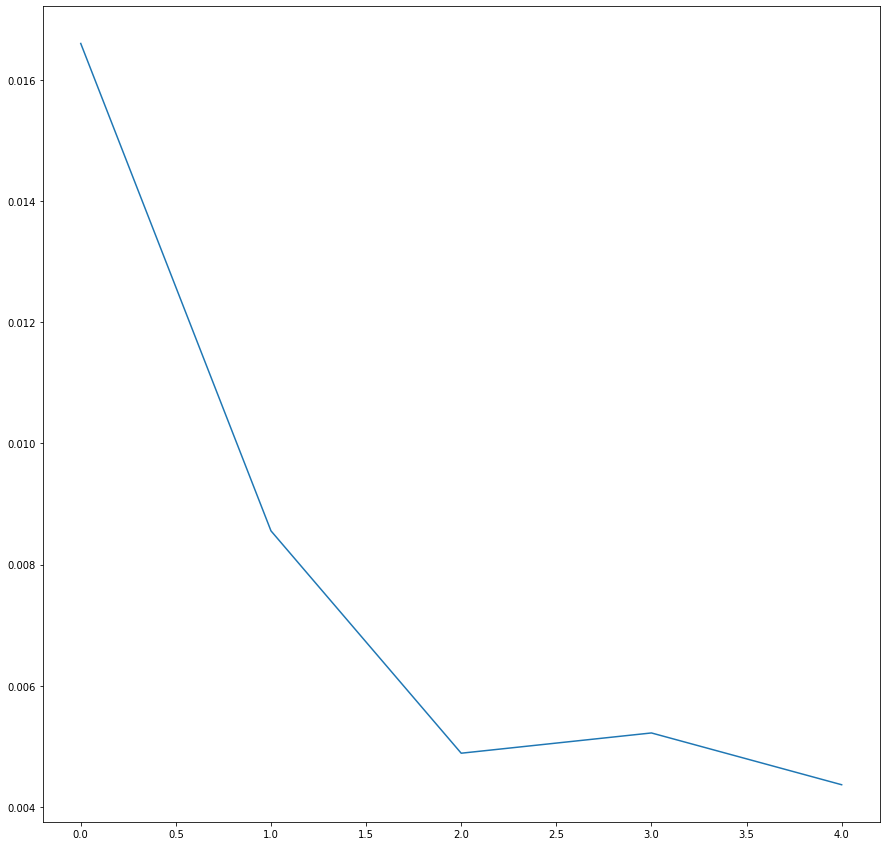

In [65]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [66]:
scaled_X_test = Xscaler.transform(x_test2)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(x_test2)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(32, 25, 8)


       y_true    y_pred
0    0.031369 -0.000003
1    0.022710  0.001540
2    0.016961  0.000244
3    0.015976 -0.001225
4    0.025367 -0.003557
..        ...       ...
272  0.550630  0.468747
273  0.581805  0.459215
274  0.855157  0.442020
275  0.731128  0.496860
276  1.000000  0.494634

[277 rows x 2 columns]


<AxesSubplot:>

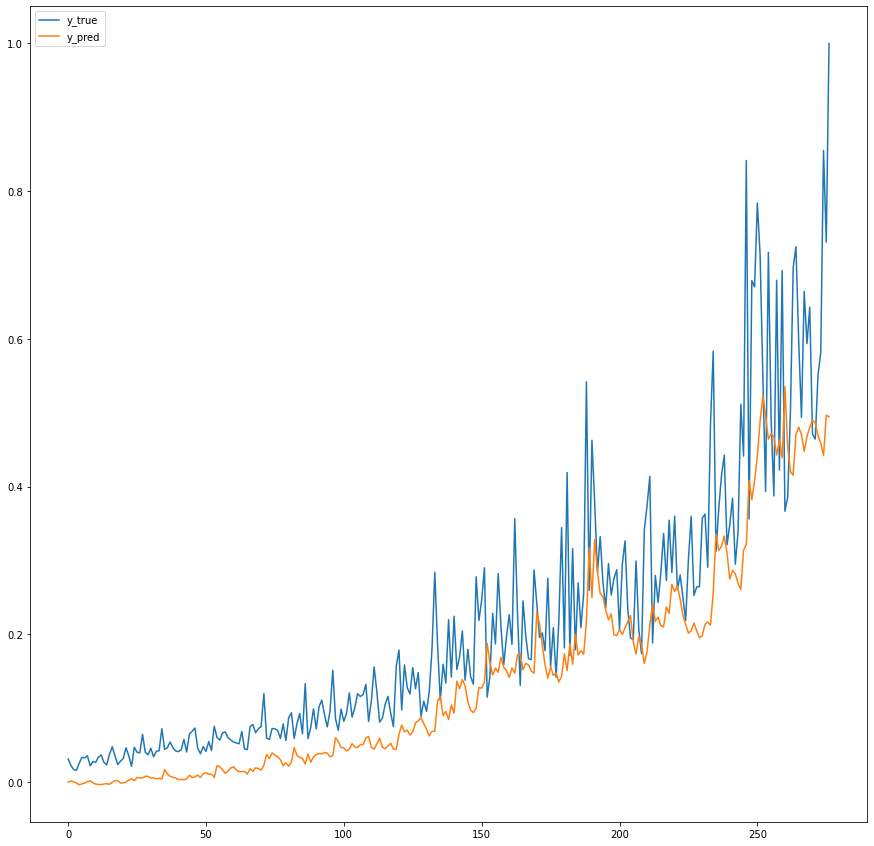

In [67]:
y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results2 = pd.DataFrame({'y_true':df2.Real.values[n_input:],'y_pred':y_pred.ravel()})
print(results2)
results2.plot()

In [68]:
results2.head(5)

,y_true,y_pred
0,0.031369,-0.000003
1,0.022710,0.001540
2,0.016961,0.000244
3,0.015976,-0.001225
4,0.025367,-0.003557


In [69]:
len(results)

NameError: name 'results' is not defined

In [ ]:
len(time_series_x)

In [ ]:
time_series_x.head(5)

In [ ]:
testingindex2 = np.linspace(0, 301, 25).astype(int)
time_x_copy = time_series_x.values.tolist()
time_x_copy_df = pd.DataFrame({'Rolling Year': time_x_copy})
time_x_copy_df.drop(testingindex2,axis=0,inplace=True)
time_x_copy2 = time_x_copy_df.values.tolist()

In [ ]:
#time series RNN for single core
plt.scatter(time_x_copy2,results['y_true'], label = 'Real Performance', color = 'r')
plt.scatter(time_x_copy2,results['y_pred'],label = 'Predicted Performance', color = 'b')
plt.xlabel('Year')
plt.ylabel('Single Core Performance')
plt.title("Prediction of Single Core Performance using LTSM RNN")
plt.legend();
plt.show()

In [ ]:
#time series RNN for multi core
plt.scatter(time_x_copy2,results2['y_true'], label = 'Real Performance', color = 'r')
plt.scatter(time_x_copy2,results2['y_pred'],label = 'Predicted Performance', color = 'b')
plt.xlabel('Year')
plt.ylabel('Multi Core Performance')
plt.title("Prediction of Multi Core Performance using LTSM RNN")
plt.legend();
plt.show()

In [ ]:
#all single core models
#time series RNN for single core
#plt.scatter(time_x_copy2,results['y_true'], label = 'Real Performance', color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfSVRs.Predicted,label = 'Support Vector Regression', color = 'cyan', alpha=0.8)
plt.scatter(time_x_copy2,results['y_pred'],label = 'RNN LSTM', color = 'b', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Single Core Performance')
#plt.title("Prediction of Single Core Performance using LTSM RNN")
#plt.legend();
#plt.show()

#time series Linear Regression for single core
plt.scatter(time_series_x['Rolling Year'],dfLRs.Predicted,label = 'Linear Regression', color = 'g', s=30,alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Single Core Performance')
#plt.title("Prediction of Single Core Performance using Linear Regression")
#plt.legend();
#plt.show()

#SVR time series for single core
#plt.scatter(time_series_x['Rolling Year'],dfSVRs.Real, label = 'Real Performance', color = 'r')
plt.plot(time_series_x['Rolling Year'],dfLRs.Real, label = 'Real Performance', color = 'r',linestyle='dashed', alpha=0.7)
plt.ylabel('Single Core Performance')
plt.xlabel('Year')
plt.title("Prediction of Single Core Performance with LR, SVR and RNN")
plt.legend();
plt.show()

In [ ]:
#time series multi core performance with all models
#time series Linear Regression for multi core
#plt.plot(time_series_x['Rolling Year'],dfLRm.Real, color = 'r') #line of real
#plt.scatter(time_series_x['Rolling Year'],dfLRm.Real, color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfLRm.Predicted,label = 'Linear Regression', color = 'g', s=30, alpha=0.7)

#SVR time series for multi core
#plt.scatter(time_series_x['Rolling Year'],dfSVRm.Real, label = 'Real Performance', color = 'r')
plt.scatter(time_series_x['Rolling Year'],dfSVRm.Predicted,label = 'Support Vector Regression', color = 'cyan', s=30, alpha=0.7)

#time series RNN for multi core
#plt.scatter(time_x_copy2,results2['y_true'], label = 'Real Performance', color = 'r')
plt.scatter(time_x_copy2,results2['y_pred'],label = 'RNN LSTM', color = 'b', s=30, alpha=0.7)

plt.plot(time_series_x['Rolling Year'],dfLRm.Real, label = 'Real Performance', color = 'r', alpha=0.7,linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Multi Core Performance')
plt.title("Prediction of Multi Core Performance with LR, SVR and RNN")
plt.legend();
plt.show()

In [ ]:
'''#stationary data read from csv
dfstat = pd.read_csv('CPUdata_stat.csv', index_col=0)
'''

In [ ]:
#dfstat.head(5)

In [ ]:
'''
dfstat['Rolling singlescore Average'] = dfstat['Rolling singlescore Average'].dropna()
dfstat['Rolling singlescore Standard Deviation'] = dfstat['Rolling singlescore Standard Deviation'].dropna()
dfstat['Rolling multiscore Average'] = dfstat['Rolling multiscore Average'].dropna()
dfstat['Rolling multiscore Standard Deviation'] = dfstat['Rolling multiscore Standard Deviation'].dropna()
dfstat['Rolling clkspd Average'] = dfstat['Rolling clkspd Average'].dropna()
dfstat['Rolling clkspd Standard Deviation'] = dfstat['Rolling clkspd Standard Deviation'].dropna()
dfstat['Rolling numcores Average'] = dfstat['Rolling numcores Average'].dropna()
dfstat['Rolling numcores Standard Deviation'] = dfstat['Rolling numcores Standard Deviation'].dropna()
dfstat['Rolling numthreads Average'] = dfstat['Rolling numthreads Average'].dropna()
dfstat['Rolling numthreads Standard Deviation'] = dfstat['Rolling numthreads Standard Deviation'].dropna()
dfstat['Rolling year Average'] = dfstat['Rolling year Average'].dropna()
dfstat['Rolling year Standard Deviation'] = dfstat['Rolling year Standard Deviation'].dropna()
'''

In [ ]:
#dfstat.head(5)

In [ ]:
#TESTING
'''
ddd = sorted(enumerate(year), key=lambda i: i[1])
print(len(ddd))
print(ddd[0])
print(ddd[910])
print(year[910])
print(ddd[0][0])
print(cpuname[0])'''

In [ ]:
#filling dictionary with csv data
'''
with open('CPUdata.csv') as csv_file:
    CPU = {}
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        #skip the first line which is the colunn names
        if line_count == 0:
            #print(row)
            line_count += 1
        else:
            CPU[row[0]] = {}
            CPU[row[0]]['singlescore'] = row[1]
            CPU[row[0]]['multiscore'] = row[2]
            CPU[row[0]]['clkspd'] = row[3]
            CPU[row[0]]['numcores'] = row[4]
            CPU[row[0]]['numthreads'] = row[5]
            CPU[row[0]]['codename'] = row[6]
            #print(row[0], row[1], row[2], row[3], row[4])
            line_count += 1 '''

In [ ]:
#print(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8])

In [ ]:
'''with open('CPUdata.csv') as csv_file:
    cpuname = []
    singlescore = []
    multiscore = []
    clkspd = []
    numcores = []
    numthreads = []
    
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        #skip the first line which is the colunn names
        if line_count == 0:
            #print(row)
            line_count += 1
        else:
            cpuname.append(row[0])
            singlescore.append(row[1])
            multiscore.append(row[2])
            clkspd.append(row[3])
            numcores.append(row[4])
            numthreads.append(row[5])
            
            #print(row[0], row[1], row[2], row[3], row[4], row[5], row[6])
            line_count += 1'''

In [ ]:
'''
# (incomplete) import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from bs4 import Tag
import random
import requests
import numpy as np
import csv
import pandas as pd
import lxml

codenameArr = []
yearArr = []
def scrap_codenameYear():

    urlLink = 'https://en.wikipedia.org/wiki/List_of_Intel_codenames'
    page = requests.get(urlLink)
    soup = bs(page.text, 'html.parser')

    table = soup.findAll('table', attrs={'class':'wikitable sortable jquery-tablesorter'})
    tbody = soup.find('tbody')

    i=0 #row number
    j=0 #col number
    for tablerow in tbody.findAll('tr'):
        print("found a row")
        print(tablerow)
        j = 0
        for tablecol in tablerow.findAll('td'):
            if j == 0:
                codenameArr.append(tablecol.text)
            j = j + 1
            
            if j == 4:
                yearArr.append(tablecol.text)
        i = i + 1
        

def getYear(codeName):

    for c,  in zip(codenameArr, range(len(codenameArr))):
        if codeName.lower() in c.lower():
            return yearArr


def readCsvFile():

    file = open('CPUdata.csv')
    csvreader = csv.reader(file)

    header = []
    header = next(csvreader)

    rows = []
    for row in csvreader:
        rows.append(row)

    file.close()

    return header,rows

def writeCsvFile():

    header,data = readCsvFile()

    header.append("year")
    for x in range(len(data)):
        data[x].append(getYear(data[x][6]))

    data = pd.DataFrame(data, columns=header)

    data.to_csv('CPUdata_v1.csv')
    '''